In [1]:
import numpy as np
import pandas as pd

# 读取train数据

In [17]:
basepath = 'E:\\李弘毅机器学习作业\\week1\\'
train_pd = pd.read_csv(basepath+'train.csv')
test_pd = pd.read_csv(basepath+'test.csv')
train_pd.head()

,Date,stations,observation,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,station,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,station,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,station,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,station,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,station,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [54]:
test_pd.head()
# 发现test没有列名，重新读取
test_pd = pd.read_csv(basepath+'test.csv',header=None,names=['id','observation'] + list(map(str,range(9))))
test_pd.head()

,id,observation,0,1,2,3,4,5,6,7,8
0,id_0,AMB_TEMP,15,14,14,13,13,13,13,13,12
1,id_0,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,id_0,CO,0.36,0.35,0.34,0.33,0.33,0.34,0.34,0.37,0.42
3,id_0,NMHC,0.11,0.09,0.09,0.1,0.1,0.1,0.1,0.11,0.12
4,id_0,NO,0.6,0.4,0.3,0.3,0.3,0.7,0.8,0.8,0.9


In [18]:
train_pm = train_pd[train_pd['observation']=='PM2.5']
train_pm.head()

,Date,stations,observation,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
9,2014/1/1,station,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13
27,2014/1/2,station,PM2.5,21,23,30,30,22,18,13,...,53,43,43,45,46,32,16,19,22,26
45,2014/1/3,station,PM2.5,19,25,27,20,16,14,15,...,32,36,34,45,40,41,23,29,23,37
63,2014/1/4,station,PM2.5,27,27,14,20,22,24,26,...,62,55,56,67,78,83,90,75,85,82
81,2014/1/5,station,PM2.5,80,80,76,81,75,66,70,...,64,73,57,57,53,70,70,60,68,66


In [160]:
# 取出pm2.5的值
# iloc 可用于对dataframe类型的数据切片， iloc[row_index, column_index]
train_pm_data = train_pm.iloc[:,3:]
train_pm_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
9,26,39,36,35,31,28,25,20,19,30,...,36,45,42,49,45,44,41,30,24,13
27,21,23,30,30,22,18,13,13,11,22,...,53,43,43,45,46,32,16,19,22,26
45,19,25,27,20,16,14,15,8,4,9,...,32,36,34,45,40,41,23,29,23,37
63,27,27,14,20,22,24,26,33,48,50,...,62,55,56,67,78,83,90,75,85,82
81,80,80,76,81,75,66,70,65,66,57,...,64,73,57,57,53,70,70,60,68,66


In [161]:
# 对test做同样的操作
test_pm = test_pd[test_pd['observation']=='PM2.5']
test_pm_data = test_pm.iloc[:,2:]
test_pm_data.head()

,0,1,2,3,4,5,6,7,8
9,27,13,24,29,41,30,29,27,28
27,46,47,57,78,84,76,59,61,61
45,10,10,25,34,40,39,36,25,22
63,71,58,51,41,41,46,43,34,29
81,13,23,18,10,5,5,13,9,12


 可以发现 train中每行的pm2.5有24个值，而test只有9个值，为保持一致，对train的每行数据作如下处理：  
 以10为窗口，1为滑动步长截取数据，每个窗口中的前9位数作为特征，最后一位作为目标值，则每行的数据可以拆分为（24-10+1）组数据；  
 对每行拆分的数据做叠加；  
 [pandas数据合并与拆分](https://blog.csdn.net/stevenkwong/article/details/52528616)

In [162]:
train_pm_data_new = []
train_pm_tag = []
for i in range(15):
    x = train_pm_data.iloc[:,i:i+9]
    x.columns = map(str, range(9))
    y = train_pm_data.iloc[:,i+9]
    y.columns = 'tag'
    train_pm_data_new.append(x)
    train_pm_tag.append(y)

In [163]:
train_pm_data_new = pd.concat(train_pm_data_new)
train_pm_tag = pd.concat(train_pm_tag)
len(train_pm_data_new.index)

3600

在投放训练之前将训练集的df类型转换为numpy类型

In [169]:
train_array_data = np.array(train_pm_data_new,float)
train_array_tag = np.array(train_pm_tag,float).reshape(len(train_array_tag),1)
test_array_data = np.array(test_pm_data,float)
train_array_data.shape, train_array_tag.shape, test_array_data.shape

((3600, 9), (3600, 1), (240, 9))

将训练集划分成训练集和验证集

In [170]:
import random
random.seed(42)
num = train_array_data.shape[0]
index = np.array(range(num))
random.shuffle(index)

split = int(num*0.8)
train_data, test_data, train_tag, test_tag = train_array_data[index[:split]], train_array_data[index[split:]], train_array_tag[index[:split]], train_array_tag[index[split:]]
train_data.shape, test_data.shape, train_tag.shape, test_tag.shape

((2880, 9), (720, 9), (2880, 1), (720, 1))

利用多元线性回归建模，参数更新采用batch GD

In [222]:
class LinearRegressionGD(object):
    def __init__(self,lr=0.0001,epochs=100):
        self.lr = lr
        self.epochs = epochs
        
    def forward(self,x):
        '''
        : param x: data, shape(n,dim)
        : return: y_hat, shape(n,1)
        '''
        return np.dot(x,self.w.T)+self.b
    
    def Batch_GD(self,x,y):
        '''
        :param self
        :param x: data, shape(n,dim)
        :param y: tag, shape(n,1)
        '''
        self.w = self.w = np.zeros((1, x.shape[1]))
        self.b = np.random.randn(1,1)
        self.cost = []
        
        for i in range(self.epochs):
            y_hat = self.forward(x)
            error = y_hat - y
            self.w -= self.lr * np.dot(error.T,x)
            self.b -= self.lr * error.sum()
            
            cost = (error**2).sum()
            self.cost.append(cost)
        return self.w, self.b, self.cost
    
    def Minibatch_GD(self,x,y,num=20):
        self.w = np.zeros((1, x.shape[1]))
        self.b = np.zeros((1,1))
        self.cost = []
        num = max(x.shape[0]//num,1)
        for i in range(self.epochs):
            # 将总样本划分成m个mini-batch
            for j in range(num):
                # 随机选取样本更新参数
                choose = []
                for n in range(num):
                    choose.append(int(np.random.uniform(0,x.shape[0])))
                x_ = x[choose]
                y_hat = self.forward(x_)
                error = y_hat - y[choose]
                self.w -= self.lr * np.dot(error.T,x_)
                self.b -= self.lr * error.sum()
                
            error = self.forward(x) - y
            self.cost.append((error**2).sum())
        return self.w, self.b, self.cost
        
    def SGD(self,x,y):
        self.w = np.zeros((1, x.shape[1]))
        self.b = np.random.randn(1,1)
        self.cost = []
        for j in range(self.epochs):
            for i in range(x.shape[0]):
                y_hat = self.forward(x[i])
                error = y_hat - y[i]
                self.w -= self.lr * error * x[i]
                self.b -= self.lr * error
                
            error = self.forward(x) - y
            self.cost.append((error**2).sum())
        return self.w, self.b, self.cost

In [201]:
import matplotlib.pyplot as plt

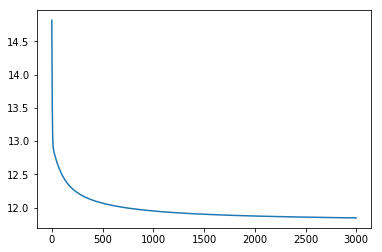

In [235]:
model = LinearRegressionGD(lr=0.00000001,epochs=3000)
w1,b1,cost = model.Batch_GD(train_data,train_tag)
plt.plot(np.log(cost))

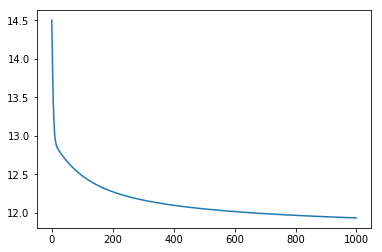

In [226]:
model = LinearRegressionGD(lr=0.00000001,epochs=1000)
w2,b2,cost = model.SGD(train_data,train_tag)
plt.plot(np.log(cost))

In [217]:
# 定义评价指标
def forward(w,b,x):
    return np.dot(x, w.T)+ b
def Loss(y_hat, y):
    loss = ((y_hat - y)**2).sum()
    return loss

In [236]:
# 用batch-GD训练出的模型做预测
y_hat = forward(w1,b1,test_data)
loss = Loss(y_hat,test_tag)
loss

33214.888567147675

In [227]:
# 用SGD训练模型做预测
y_hat = forward(w2,b2,test_data)
loss = Loss(y_hat,test_tag)
loss

36852.80782991596

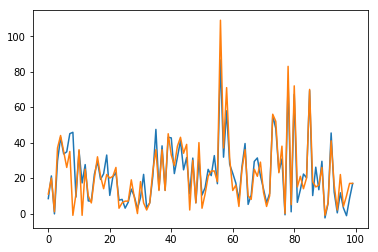

In [246]:
# 利用BGD模型做预测的predict与实际值绘图
y_hat = forward(w1,b1,test_data)
plt.plot(np.array(range(100)),y_hat[:100],test_tag[:100])

# 将BGD模型用于预测test数据

In [247]:
y_predict = forward(w1,b1,test_array_data)

In [249]:
y_submit=pd.read_csv('E:\\李弘毅机器学习作业\\week1\\sampleSubmission.csv')
y_submit.value=y_predict   #get value by .value   automatically identify numbers
y_submit.to_csv('E:\\李弘毅机器学习作业\\week1\\sampleSubmission.csv',index=False)